<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_airfoil_S809_combined_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth

In [2]:
from google.colab import auth
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/Data_from_Karim/AirfoilS809/

data_set1.csv  data_set2.csv  data_set3.csv  data_set4.csv  neuralNetwork_reg.py  ReadMe.docx


In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5,h1 = 41, h2 = 41, h3 =40, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = F.sigmoid(self.fc3(x))
    x = self.out(x)

    return x

In [7]:
# torch.manual_seed(42)

model = Model()

In [8]:
# Read the data set - data_set3.csv --> Airfoil S809, Re = 2e6, alpha = 14.2 deg
df1 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set4.csv")

In [9]:
# ###########################################################################
# # Plotting raw data
# ######################################
# it = df1
# xc = np.array(it['x'])
# yc = np.array(it['y'])
# b = np.array(it['beta'])
# b1 = []


# # Normalize x and y coordinates
# min_range = -5.0
# max_range = 5.0
# xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
# yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


# nx = []
# ny = []
# nb = []

# # Filter data for the specified range of coordinates
# for i in range(len(xc)):
#   if xc[i]>=4.9 and xc[i]<=5.3:
#     if yc[i]>=4.925 and yc[i]<=5.075:
#       nx.append(xc[i])
#       ny.append(yc[i])
#       nb.append(b[i])

# # Create a scatter plot
# plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
# plt.colorbar(label='Beta Field')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('2D Map with Scatter Plot')
# plt.show()
# ###############################################################################

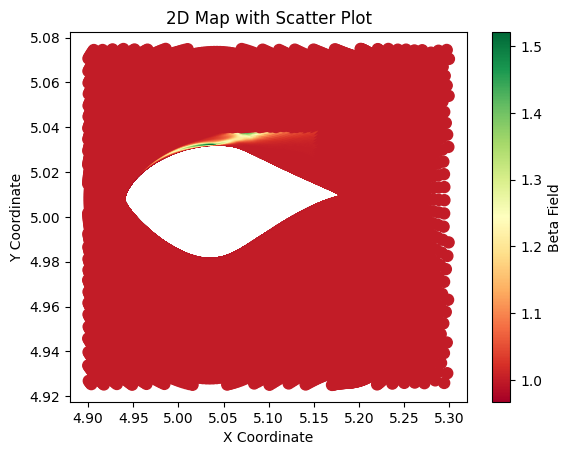

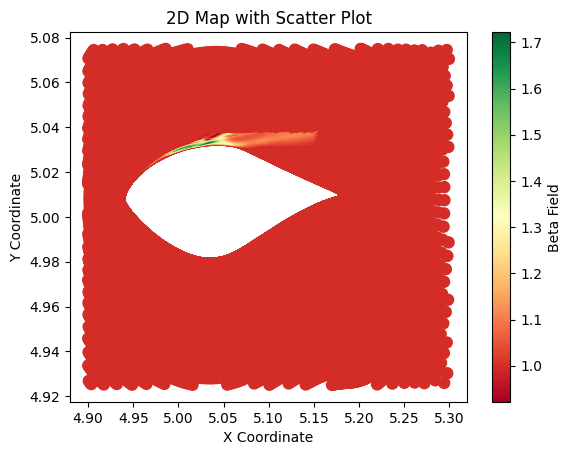

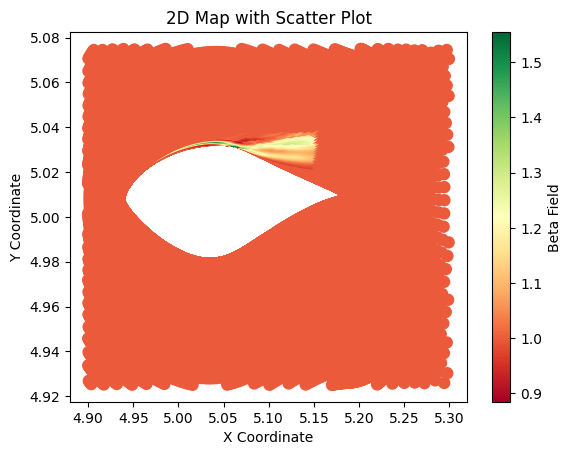

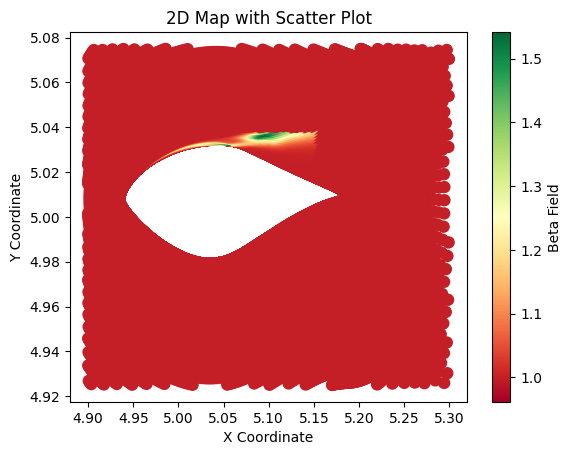

In [10]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  b1 = []


  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  # #####################################################################
  # Cleaning the beta field in the wake region
  for k in range(len(xc)):
    if xc[k] >= 5.2 and xc[k] <= 5.3:
      if yc[k] >= 4.94 and yc[k] <= 4.96:
        b1.append(b[k])

  for j in range(len(xc)):
    if xc[j] > 5.15 or yc[j]>5.04:
      b[j] = np.mean(b1)

  modified_data = {
    'x': np.array(xc),
    'y': np.array(yc),
    'beta': np.array(b),
    'feature1': np.array(item['feature1']),
    'feature2': np.array(item['feature2']),
    'feature3': np.array(item['feature3']),
    'feature4': np.array(item['feature4']),
    'feature5': np.array(item['feature5'])
  }

  item = pd.DataFrame(modified_data)

  ff.append(item)

  # #####################################################################
  # Plotting cleaned data
  ################################
  nx = []
  ny = []
  nb = []


  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.9 and xc[i]<=5.3:
      if yc[i]>=4.925 and yc[i]<=5.075:
        nx.append(xc[i])
        ny.append(yc[i])
        nb.append(b[i])

  # Create a scatter plot
  plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Beta Field')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('2D Map with Scatter Plot')
  plt.show()
###############################################################################

df = pd.concat(ff)

# Data for beta>1.02 or beta<0.98
df_filtered = df[(df['beta'] > 1.005) | (df['beta'] < 0.995)]

# df_filtered

# df

In [11]:
from sklearn.preprocessing import StandardScaler



# Preprocess Features
df1 = df_filtered.drop(['x','y','beta'],axis=1)


# Fill missing values with the mean
df1 = df1.fillna(df1.mean())


# Standardization
standard_scaler = StandardScaler()

# Features
X = standard_scaler.fit_transform(df1)

# Target
y = df_filtered['beta'].values



In [12]:
criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [13]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=5,shuffle=False)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 100
train_fold = [[] for i in range(5)]
test_fold = [[] for i in range(5)]
c = 0
for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_fold[c].append(y_pred.detach().numpy())
  train_fold[c].append(y_train.detach().numpy())
  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  test_fold[c].append(y_eval.detach().numpy())
  test_fold[c].append(y_test.detach().numpy())

  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

  c = c+1

Train Index:  [ 2799  2800  2801 ... 13988 13989 13990] 

Test Index:  [   0    1    2 ... 2796 2797 2798]
Size of training data: 11192 

Size of testing data: 2799 



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11192])) that is different to the input size (torch.Size([11192, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


iter: 0 and loss: 1.0740095376968384
iter: 10 and loss: 0.022356830537319183
iter: 20 and loss: 0.018025290220975876
iter: 30 and loss: 0.01800793968141079
iter: 40 and loss: 0.01800786890089512
iter: 50 and loss: 0.01800786890089512
iter: 60 and loss: 0.01800786890089512
iter: 70 and loss: 0.01800786703824997
iter: 80 and loss: 0.01800786890089512
iter: 90 and loss: 0.01800786703824997


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2799])) that is different to the input size (torch.Size([2799, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11193])) that is different to the input size (torch.Size([11193, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.0139)]
MSE error: [0.013956595]
Train Index:  [    0     1     2 ... 13988 13989 13990] 

Test Index:  [2799 2800 2801 ... 5594 5595 5596]
Size of training data: 11193 

Size of testing data: 2798 

iter: 0 and loss: 0.01705407164990902
iter: 10 and loss: 0.017050085589289665
iter: 20 and loss: 0.017050068825483322
iter: 30 and loss: 0.017050066962838173
iter: 40 and loss: 0.017050068825483322
iter: 50 and loss: 0.017050066962838173
iter: 60 and loss: 0.017050066962838173
iter: 70 and loss: 0.017050066962838173
iter: 80 and loss: 0.017050068825483322
iter: 90 and loss: 0.017050066962838173


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2798])) that is different to the input size (torch.Size([2798, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11193])) that is different to the input size (torch.Size([11193, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.0139), tensor(0.0178)]
MSE error: [0.013956595, 0.017687213]
Train Index:  [    0     1     2 ... 13988 13989 13990] 

Test Index:  [5597 5598 5599 ... 8392 8393 8394]
Size of training data: 11193 

Size of testing data: 2798 

iter: 0 and loss: 0.01409382838755846
iter: 10 and loss: 0.013885394670069218
iter: 20 and loss: 0.013884560205042362
iter: 30 and loss: 0.013884557411074638
iter: 40 and loss: 0.01388455554842949
iter: 50 and loss: 0.01388455554842949
iter: 60 and loss: 0.01388455554842949
iter: 70 and loss: 0.01388455554842949
iter: 80 and loss: 0.01388455554842949
iter: 90 and loss: 0.01388455554842949


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2798])) that is different to the input size (torch.Size([2798, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11193])) that is different to the input size (torch.Size([11193, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.0139), tensor(0.0178), tensor(0.0309)]
MSE error: [0.013956595, 0.017687213, 0.030982893]
Train Index:  [    0     1     2 ... 13988 13989 13990] 

Test Index:  [ 8395  8396  8397 ... 11190 11191 11192]
Size of training data: 11193 

Size of testing data: 2798 

iter: 0 and loss: 0.01826232112944126
iter: 10 and loss: 0.018095213919878006
iter: 20 and loss: 0.018094545230269432
iter: 30 and loss: 0.018094541504979134
iter: 40 and loss: 0.018094541504979134
iter: 50 and loss: 0.018094541504979134
iter: 60 and loss: 0.018094541504979134
iter: 70 and loss: 0.018094541504979134
iter: 80 and loss: 0.018094541504979134
iter: 90 and loss: 0.018094541504979134


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2798])) that is different to the input size (torch.Size([2798, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11193])) that is different to the input size (torch.Size([11193, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSEloss: [tensor(0.0139), tensor(0.0178), tensor(0.0309), tensor(0.0135)]
MSE error: [0.013956595, 0.017687213, 0.030982893, 0.013515287]
Train Index:  [    0     1     2 ... 11190 11191 11192] 

Test Index:  [11193 11194 11195 ... 13988 13989 13990]
Size of training data: 11193 

Size of testing data: 2798 

iter: 0 and loss: 0.018703702837228775
iter: 10 and loss: 0.018702730536460876
iter: 20 and loss: 0.01870272308588028
iter: 30 and loss: 0.01870272308588028
iter: 40 and loss: 0.01870272308588028
iter: 50 and loss: 0.01870272308588028
iter: 60 and loss: 0.01870272308588028
iter: 70 and loss: 0.01870272308588028
iter: 80 and loss: 0.01870272308588028
iter: 90 and loss: 0.01870272308588028
MSEloss: [tensor(0.0139), tensor(0.0178), tensor(0.0309), tensor(0.0135), tensor(0.0111)]
MSE error: [0.013956595, 0.017687213, 0.030982893, 0.013515287, 0.011152088]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2798])) that is different to the input size (torch.Size([2798, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 0, 'Epoch')

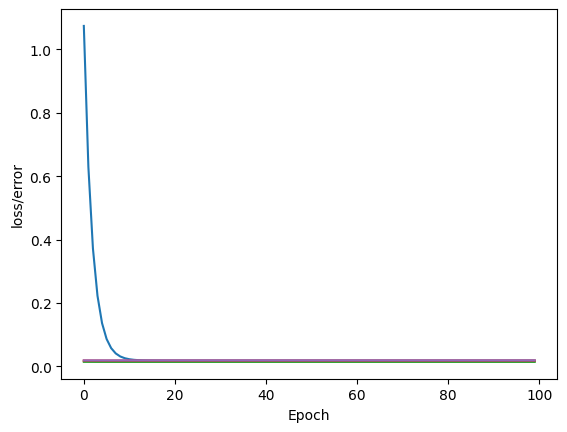

In [14]:
plt.plot(range(iterations), training_cost[0])
plt.plot(range(iterations), training_cost[1])
plt.plot(range(iterations), training_cost[2])
plt.plot(range(iterations), training_cost[3])
plt.plot(range(iterations), training_cost[4])
plt.ylabel("loss/error")
plt.xlabel('Epoch')

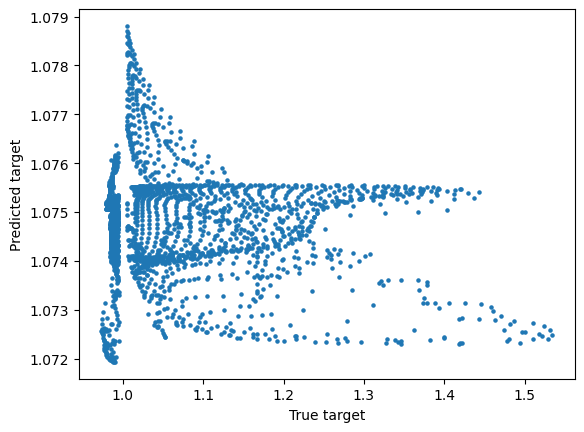

In [19]:
# plt.plot(test_fold[0][0],test_fold[0][1],'bo',markersize = 1)
plt.scatter(test_fold[4][1],test_fold[4][0],s =5 )
# plt.scatter(train_fold[1][0],train_fold[1][1], s=5)
plt.xlabel('True target')
plt.ylabel('Predicted target')
# plt.xlim(-0.2,0.2)
# plt.ylim(-0.2,0.2)
plt.show()
# len(test_fold[3][0]), len(test_fold[3][1])